In [ ]:
import pandas as pd

df = pd.read_csv("/customer_churn_dataset-training-master.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


Overall Churn Rate

In [ ]:
churn_rate = df["Churn"].value_counts(normalize=True) * 100
churn_rate

,proportion
Churn,
1.0,56.71072
0.0,43.28928


Churn By Gender

In [ ]:
df.groupby("Gender")["Churn"].value_counts(normalize=True) * 100

Gender  Churn
Female  1.0      66.669115
        0.0      33.330885
Male    0.0      50.873120
        1.0      49.126880
Name: proportion, dtype: float64

Churn By Contract Length

In [ ]:
df.groupby("Contract Length")["Churn"].value_counts(normalize=True) * 100

Contract Length  Churn
Annual           0.0       53.923859
                 1.0       46.076141
Monthly          1.0      100.000000
Quarterly        0.0       53.974395
                 1.0       46.025605
Name: proportion, dtype: float64

Churn vs Tenure

In [ ]:
df["TenureGroup"] = pd.cut(
    df["Tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-1 year", "1-2 years", "2-4 years", "4+ years"]
)

In [ ]:
df.groupby("TenureGroup")["Churn"].value_counts(normalize=True) * 100

/tmp/ipython-input-3832903487.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("TenureGroup")["Churn"].value_counts(normalize=True) * 100


TenureGroup  Churn
0-1 year     1.0      58.734391
             0.0      41.265609
1-2 years    1.0      63.272350
             0.0      36.727650
2-4 years    1.0      54.125569
             0.0      45.874431
4+ years     1.0      54.297040
             0.0      45.702960
Name: proportion, dtype: float64

Churn vs Monthly Behavior

In [ ]:
df["AvgMonthlySpend"] = df["Total Spend"] / df["Tenure"]

In [ ]:
df["AvgMonthlySpend"] = df["AvgMonthlySpend"].replace([float("inf")], 0)

In [ ]:
df.groupby("Churn")["AvgMonthlySpend"].mean()

,AvgMonthlySpend
Churn,
0.0,50.399342
1.0,42.538850


# **Visualizations**

Churn by Contract Length

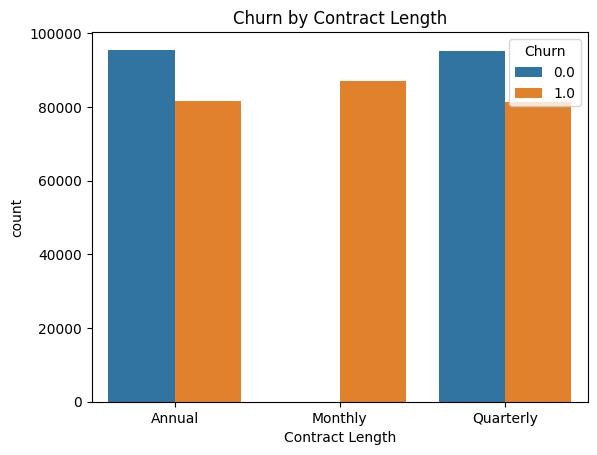

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Contract Length", hue="Churn")
plt.title("Churn by Contract Length")
plt.show()

Churn by Tenure Group

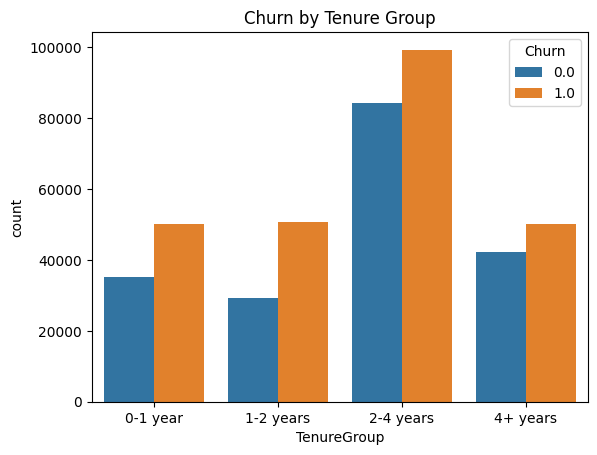

In [ ]:
sns.countplot(data=df, x="TenureGroup", hue="Churn")
plt.title("Churn by Tenure Group")
plt.show()